# Generate Gaussian data

This first tutorial is aimed at the very basic use of the ``pyMultiFit`` library, that is, to generate Gaussian data via the **GaussianDistribution** class.

## Example 1: $\mathcal{N}(0, 1)$
Let's generate $\mathcal{N}(0, 1)$ using `pyMultiFit`. For comparison, we will also do he same with `scipy.stats.norm`.

In [1]:
from scipy.stats import norm

from pymultifit.distributions import GaussianDistribution

Calling the Gaussian distribution is as easy as writing **GaussianDistribution**.

In [2]:
gdist1 = GaussianDistribution()
gdist2 = norm()

The **GaussianDistribution** takes four optional arguments,

* `amplitude`
* `mean`
* `standard_deviation`
* `normalize`

For now, our only concerns are **mean** and **standard_deviation** which are automatically set to $0$ and $1$. Next, we set up our array to generate the gaussian,

In [3]:
import numpy as np

x = np.linspace(-5, 5, 10_000)
y1 = gdist1.pdf(x)
y2 = gdist2.pdf(x)

Finally, let's see the plots for both of these distributions,

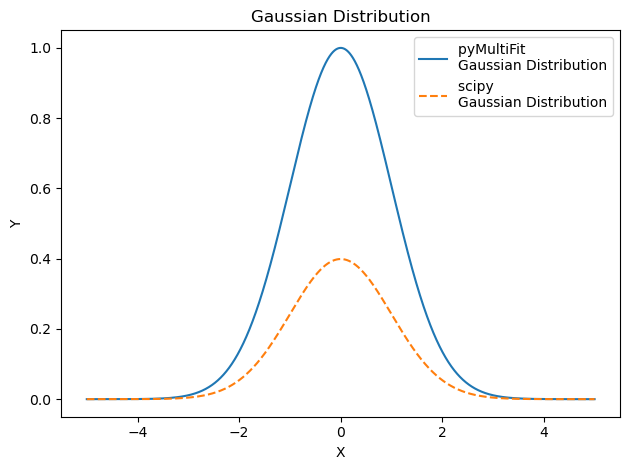

In [4]:
import matplotlib.pyplot as plt

plt.plot(x, y1, ls='-', label='pyMultiFit \nGaussian Distribution')
plt.plot(x, y2, ls='--', label='scipy \nGaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Distribution')
plt.legend()
plt.tight_layout()
plt.show()

But what's this? The distributions don't align up.

This is intended, the distributions created by the ``pyMultiFit`` library is intended to be **un-normalized**, more on this later. In order to generate a **normalized** distribution, we can set the **normalize** argument to `True`.

In [5]:
gdist1 = GaussianDistribution(normalize=True)
y1 = gdist1.pdf(x)

Now, if we re-plot both the distributions, we get,

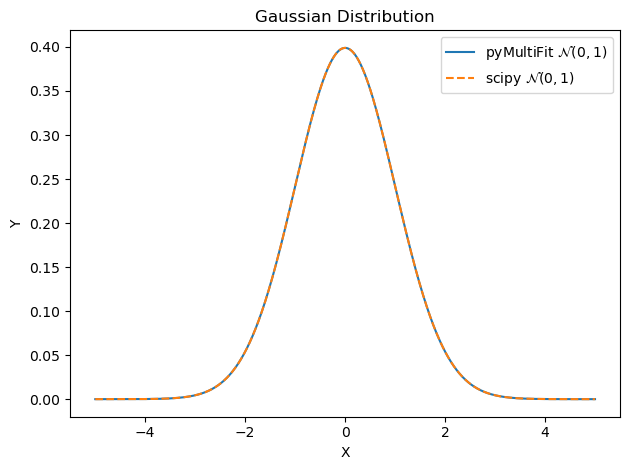

In [6]:
plt.plot(x, y1, ls='-', label='pyMultiFit ' + r'$\mathcal{N}(0, 1)$')
plt.plot(x, y2, ls='--', label='scipy ' + r'$\mathcal{N}(0, 1)$')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Distribution')
plt.legend()
plt.tight_layout()
plt.show()

Which is exactly what we wanted.

## Example 2: $\mathcal{N}(-2, 0.5)$

Now let's see how `pyMultiFit` handles $\mu=-2$ and $\sigma = 0.5$ for our normal distribution.

In [7]:
# define N(-2, 0.5) using pyMultiFit and scipy
gdist1 = GaussianDistribution(mean=-2, standard_deviation=0.5, normalize=True)
gdist2 = norm(loc=-2, scale=0.5)

# generate their PDFs
y1 = gdist1.pdf(x)
y2 = gdist2.pdf(x)

Again, we set **normalize** keyword to `True` to get the normalized Gaussian distribution. Now, let's see the two distributions again,

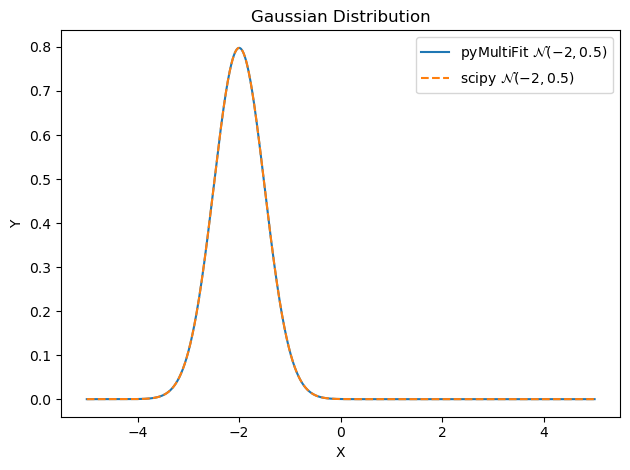

In [8]:
plt.plot(x, y1, ls='-', label='pyMultiFit ' + r'$\mathcal{N}(-2, 0.5)$')
plt.plot(x, y2, ls='--', label='scipy ' + r'$\mathcal{N}(-2, 0.5)$')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Distribution')
plt.legend()
plt.tight_layout()
plt.show()

Looks great!

## Example 3: $\mathcal{N}(3, 0.5, 0.5, \text{False})$

We've seen the usage of **mean**, **standard_deviation** and **normalize** keywords, now we'll learn about the **amplitude** parameter.

The standard Gaussian distribution is defined as,

$$
f(x; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left[-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2\right]
$$

However, this can also be written in terms of amplitude as,

$$
f(x; \mu, \sigma) = A\exp\left[-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2\right]
$$

where $A$ now replaces the normalization factor of the distribution as its **amplitude**.
The **amplitude** parameter forces the distribution to be **non-normalized** which often reflects the magnitude of the data when dealing with data with probability > 1.

To generate an amplitude-based Gaussian, we can simply provide the **amplitude** parameter, as follows,

In [9]:
# define amplitude, mean, and standard_deviation for ease of use
amplitude = 3
mean = 0.5
standard_deviation = 0.5

gdist1 = GaussianDistribution(amplitude, mean, standard_deviation)
gdist2 = norm(loc=mean, scale=standard_deviation)

The same can be achieved with scipy as well, but requires some tweakings,

In [10]:
y1 = gdist1.pdf(x)

# define the normalization factor to un-normalize scipy distribution
norm_ = np.sqrt(2 * np.pi * standard_deviation**2)
y2 = gdist2.pdf(x) * (amplitude * norm_)

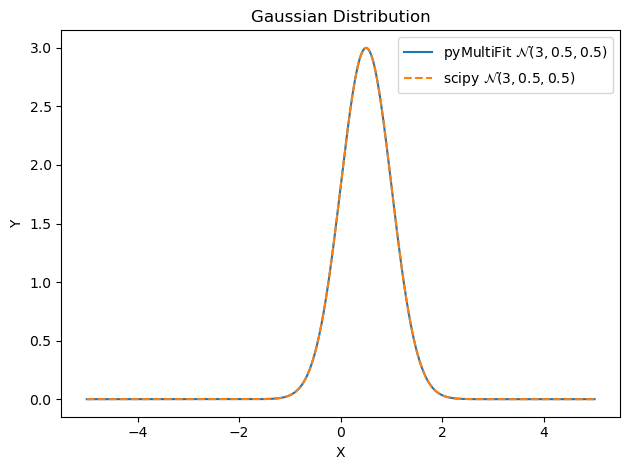

In [11]:
plt.plot(x, y1, ls='-', label='pyMultiFit ' + r'$\mathcal{N}(3, 0.5, 0.5)$')
plt.plot(x, y2, ls='--', label='scipy ' + r'$\mathcal{N}(3, 0.5, 0.5)$')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Distribution')
plt.legend()
plt.tight_layout()
plt.show()

By having a built-in **amplitude** parameter with **normalize** parameter, the library allows user to generate both **normalized** and **un-normalized** distributions on the go.

Next, we'll see how to generate N-Gaussian data using **generators** module.